Top predictors of 'participating':
                    feature  importance
0               subscribers    0.195581
7            num_moderators    0.175765
8                 num_rules    0.161676
1              active_users    0.150064
2             subreddit_age    0.123243
5   comment_score_hide_mins    0.066948
9                is_default    0.023570
16        has_automod_False    0.021142
17         has_automod_True    0.020232
6              allow_images    0.019395


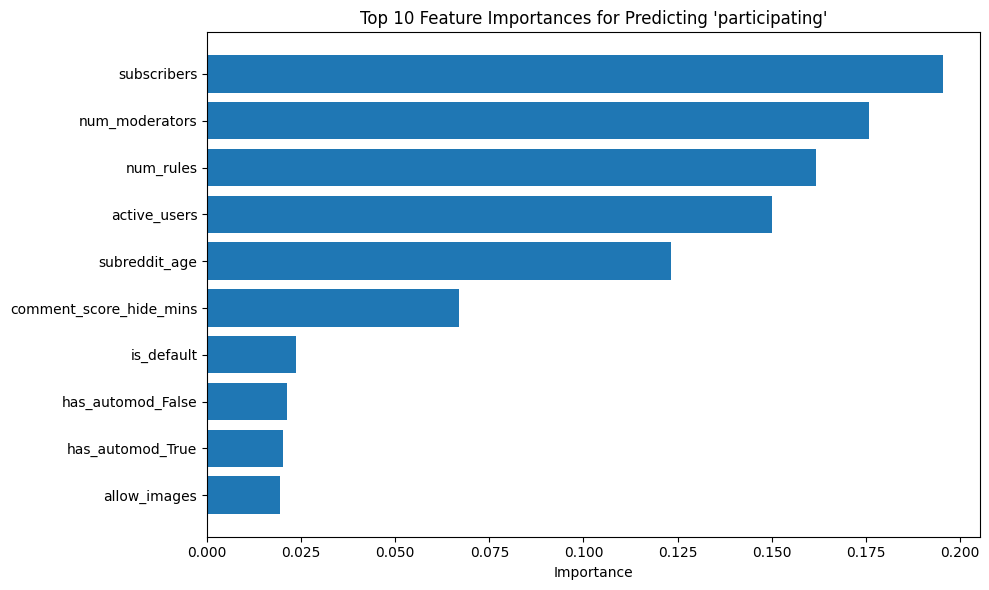

In [4]:
import json
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset
with open("/Users/preethi/Documents/Spring25/SC/SCProject/CS6474/features/final_all.json", "r") as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Separate target variable
y = df["participating"]

# Drop non-predictive or identifier columns
X = df.drop(columns=["name", "title", "description", "participating"])

# One-hot encode categorical columns
X = pd.get_dummies(X)

# Split data (optional but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importance
importances = clf.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({"feature": feature_names, "importance": importances})
importance_df = importance_df.sort_values("importance", ascending=False)

# Print top predictors
print("Top predictors of 'participating':")
print(importance_df.head(10))

# Optional: visualize
plt.figure(figsize=(10, 6))
plt.barh(importance_df.head(10)["feature"][::-1], importance_df.head(10)["importance"][::-1])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances for Predicting 'participating'")
plt.tight_layout()
plt.show()
